In [55]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\ipobo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import igraph as ig
import hypernetx as hnx
from hypernetx import drawing
import hypernetx.algorithms.generative_models as gm
import hypernetx.algorithms.hypergraph_modularity as hmod
import hnxwidget as hnxw
#import graphviz
import math
import warnings
from collections import defaultdict
import pandas as pd
from hypernetx import Hypergraph
from networkx.algorithms.community import k_clique_communities

from netgraph import Graph
import community
from community import community_louvain
from collections import Counter

from itertools import chain
import matplotlib.patches as mpatches
import time

import clusim
from clusim.clustering import Clustering, print_clustering
import clusim.sim as sim

In [57]:
def grapher(n, m, p, x):
    if ((n == 0 or m == 0) and p == 0):
        H = hnx.Hypergraph(x)
    else:
        H = gm.erdos_renyi_hypergraph(n, m, p)
    return H

def drawer(H):
    #rubberband = hnx.drawing.rubber_band.draw(H)
    #try:    
    #    bipartit = hnx.drawing.two_column.draw(H)
    #except:
    #    print("No Bipartit for this one")
    #else:
    #    print("Nothing went wrong")
    normal = hmod.two_section(H)
    
    
    return normal

start = time.time()

# Jó
### julia --project abcdh.jl -n 1000 -d 2.5,5,25 -c 1.5,5,75 -x 0.2 -q 0.1,0.2,0.3,0.2,0.2 -w :strict -s 1234 -o 1000_0.2_strict
    

In [58]:
fallout3 = pd.read_csv('./1000_0.2_strict_he.txt', delimiter="  ", header = None).to_dict()[0]

comms = np.loadtxt('./1000_0.2_strict_comm.txt')
assign = np.loadtxt('./1000_0.2_strict_assign.txt')
deg = np.loadtxt('./1000_0.2_strict_deg.txt')
  
f03 = {key: list(map(int, value.split())) for key, value in fallout3.items()}

for i in range(0, len(list(f03.keys()))):
    newkeys = (['l' + str(x) for x in range(len(f03))])
    f03[newkeys[i]]=f03.pop(list(f03.keys())[0])


C:\Users\ipobo\AppData\Local\Temp\ipykernel_24608\735161552.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fallout3 = pd.read_csv('./1000_0.2_strict_he.txt', delimiter="  ", header = None).to_dict()[0]


# Plots

In [59]:
f03p = grapher(0 ,0 ,0 ,f03)
f03p_2 = drawer(f03p)

plt.rcParams['figure.figsize'] = [20, 20]

#print("Hyperedges for 0.5 linear -- fallout:")
#f03p_1

In [60]:
G = nx.Graph()
names = f03p_2.vs['name']
G.add_nodes_from(names)
G.add_edges_from([(names[x[0]], (names[x[1]])) for x in f03p_2.get_edgelist()])

#nx.draw_networkx(G, pos=None, arrows=None, with_labels=True)

In [61]:
len(f03)

3453

In [62]:
weights = []
sizes = []

for i in range(0, len(f03)):    
    result = [f03[key] for key in f03.keys()]
    sizes.append(len(result[i]))


In [63]:
nxlist = ([(names[x[0]], (names[x[1]])) for x in f03p_2.get_edgelist()])
"""
w = []

for i in range(0, len(nxlist)-1):
    for l in range(0, len(f03)):
        if (nxlist[i][0] in [f03[key] for key in f03.keys()][l]) and (nxlist[i][1] in [f03[key] for key in f03.keys()][l]):
           w.append(1/(len([f03[key] for key in f03.keys()][l])-1)) 

w
"""

w = np.array(np.zeros(len(nxlist)))
nxlist = ([(names[x[0]], (names[x[1]])) for x in f03p_2.get_edgelist()])

for i in range(0, len(nxlist)-1):
    for l in range(0, len(f03)):
        if (nxlist[i][0] in [f03[key] for key in f03.keys()][l]) and (nxlist[i][1] in [f03[key] for key in f03.keys()][l]):
           w[i] += (1/(len([f03[key] for key in f03.keys()][l])-1)) 

w

KeyboardInterrupt: 

In [ ]:
nxlistnew = []
for k in range(0, len(w)-1):
    nxlistnew.append(nxlist[k] + (w[k], ))
    
nxlistnew

[(57, 117, 0.8333333333333333),
 (57, 275, 0.3333333333333333),
 (57, 768, 0.5833333333333333),
 (57, 563, 0.3333333333333333),
 (57, 10, 2.6666666666666665),
 (57, 929, 0.3333333333333333),
 (57, 12, 0.25),
 (57, 265, 0.25),
 (57, 113, 1.0),
 (57, 126, 1.0),
 (57, 667, 0.5),
 (57, 136, 1.0),
 (57, 2, 0.25),
 (57, 980, 0.3333333333333333),
 (57, 307, 0.5),
 (57, 271, 0.3333333333333333),
 (57, 368, 0.6666666666666666),
 (57, 825, 0.3333333333333333),
 (57, 14, 0.25),
 (57, 259, 0.5),
 (57, 670, 0.25),
 (57, 591, 0.5),
 (57, 553, 0.25),
 (57, 181, 0.25),
 (57, 843, 1.0),
 (57, 765, 0.5),
 (57, 175, 0.5),
 (57, 369, 0.3333333333333333),
 (57, 263, 0.3333333333333333),
 (57, 223, 0.3333333333333333),
 (57, 518, 0.3333333333333333),
 (57, 296, 0.3333333333333333),
 (57, 227, 0.5),
 (57, 859, 0.3333333333333333),
 (117, 275, 0.3333333333333333),
 (117, 768, 0.3333333333333333),
 (117, 563, 0.5),
 (117, 10, 0.75),
 (117, 159, 0.25),
 (117, 77, 0.25),
 (117, 113, 0.5),
 (117, 126, 0.75),
 (11

In [ ]:
"""
G2 = nx.Graph() 
G2.add_weighted_edges_from(nxlistnew)

pos = nx.spring_layout(G2, seed=7)

nx.draw_networkx_nodes(G2, pos, node_size=700)

# edges
nx.draw_networkx_edges(G2, pos, width=5)


# node labels
nx.draw_networkx_labels(G2, pos, font_size=5, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G2, "weight")
nx.draw_networkx_edge_labels(G2, pos, edge_labels)
"""

'\nG2 = nx.Graph() \nG2.add_weighted_edges_from(nxlistnew)\n\npos = nx.spring_layout(G2, seed=7)\n\nnx.draw_networkx_nodes(G2, pos, node_size=700)\n\n# edges\nnx.draw_networkx_edges(G2, pos, width=5)\n\n\n# node labels\nnx.draw_networkx_labels(G2, pos, font_size=5, font_family="sans-serif")\n# edge weight labels\nedge_labels = nx.get_edge_attributes(G2, "weight")\nnx.draw_networkx_edge_labels(G2, pos, edge_labels)\n'

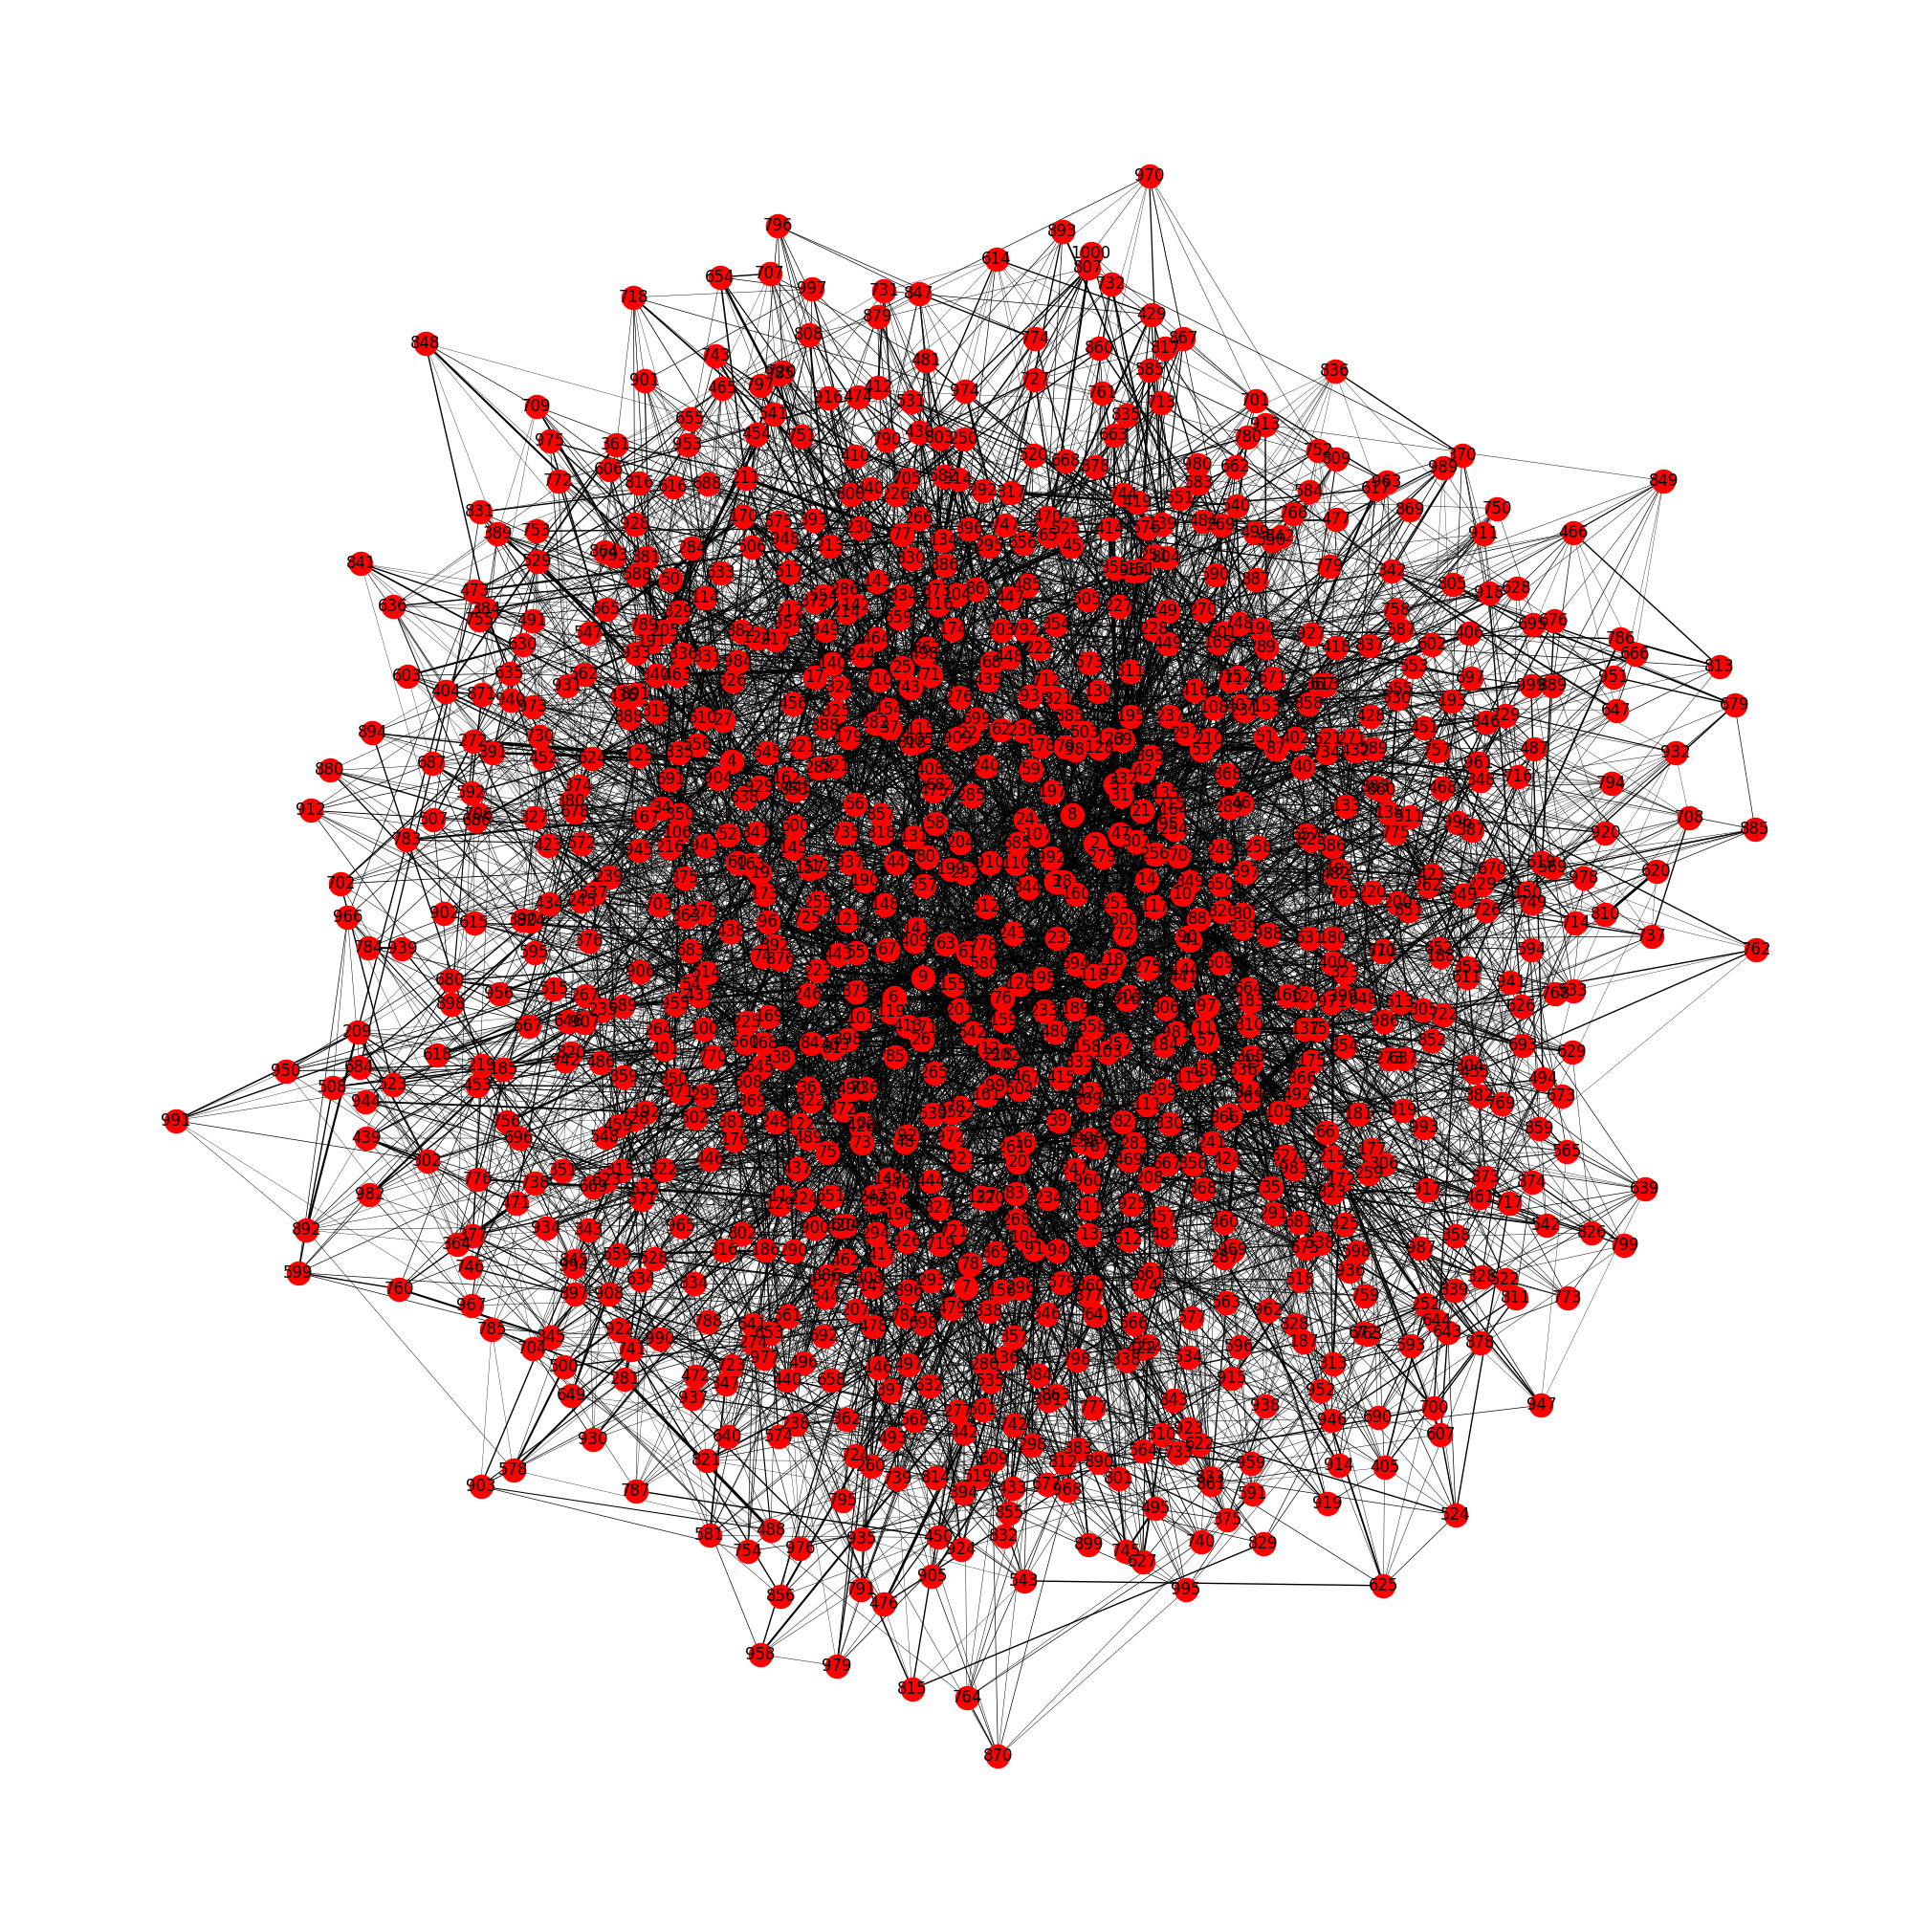

In [ ]:
G2 = nx.Graph() 
G2.add_weighted_edges_from(nxlistnew)

edges,weights = zip(*nx.get_edge_attributes(G2,'weight').items())

pos = nx.spring_layout(G2)

#nx.draw(G2, pos, node_color='r',with_labels=True, edgelist=edges, edge_color = weights, width=10.0, edge_cmap=plt.cm.Greens)

nx.draw(G2, pos, node_color='r',with_labels=True, edgelist=edges, width=weights*10)

#plt.savefig('edges.png')

In [ ]:
print('Az átlag fokszám a hipergráfon belül:', np.average(deg))

degrees = [G.degree(n) for n in G.nodes()]
print('Az átlag fokszám a kivetített hálón:', np.average(degrees))

Az átlag fokszám a hipergráfon belül: 7.852
Az átlag fokszám a kivetített hálón: 15.852


Text(0.5, 1.0, 'Graph Degree distribution')

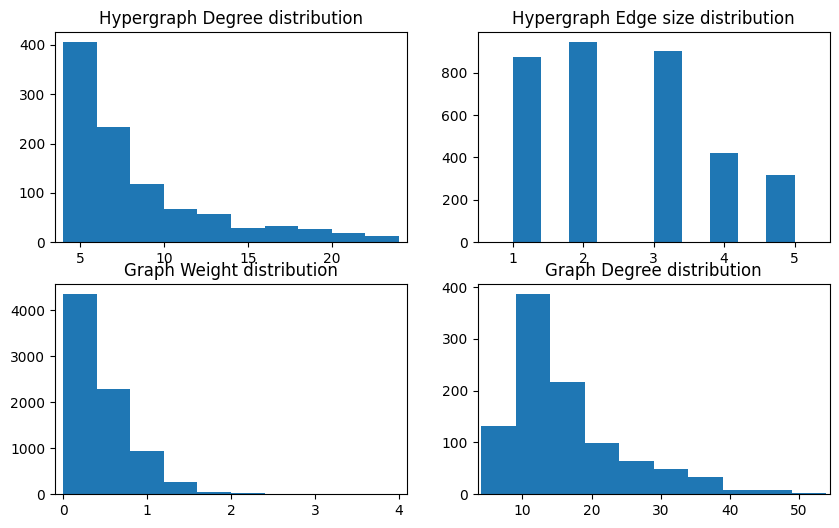

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axes[0][0].set_xlim([min(deg)-0.5, max(deg)+0.5])
axes[0][0].hist(deg)
axes[0][0].set_title('Hypergraph Degree distribution')

axes[0][1].set_xlim([min(sizes)-0.5, max(sizes)+0.5])
axes[0][1].hist(sizes, align='mid')
axes[0][1].set_title('Hypergraph Edge size distribution')

axes[1][0].set_xlim([min(w)-0.1, max(w)+0.1])
axes[1][0].hist(w)
axes[1][0].set_title('Graph Weight distribution')

axes[1][1].set_xlim([min(degrees)-0.5, max(degrees)+0.5])
axes[1][1].hist(degrees)
axes[1][1].set_title('Graph Degree distribution')

# Community search and colouring

In [ ]:
def clique_coloring(graph, k):
    communities = []
    color_map=[]
    size=[]
    legend = []
    lista = []

    for i in range(0, len(list(k_clique_communities(graph, k, cliques=None)))):
        communities.append(sorted(list(k_clique_communities(graph, k))[i]))    
        
    number_of_colors = len(communities)

    color = ["#"+''.join([random.choice('0123456789ABCDEF') for k in range(6)])
                for l in range(number_of_colors)]
    
    trier = {color[i] : communities[i] for i in range(0, len(communities)) if (color[i] != '#FF0000' or color[i] != '#808080')}

    for node in nodelist:
        if node in list(chain(*trier.values())):
            if (list(chain(*trier.values())).count(node) == 1):
                #color_map.append('green')
                for i in range(0, len(list(trier.values()))):
                    if (node in list(trier.values())[i]) == True:
                        c = color[i] 
                        color_map.append(c)
            else:
                color_map.append('#FF0000')
        else:
            color_map.append('#808080')


    for i in range (0, len(color_map)):
        if color_map[i] == '#FF0000':
            size.append(600)
        elif color_map[i] == '#808080':
            size.append(250)
        else:
            size.append(450)
        
    for i in range(0, len(communities)):
        legend.append(mpatches.Patch(color=color[i], label=(communities[i])))
        lista = legend + [mpatches.Patch(color= '#FF0000', label='Multigroups'), mpatches.Patch(color= '#808080', label='0 groups')]
    
    if communities == []:
        print('No groups for k =', k)
    else:
        nx.draw(graph, pos = nx.kamada_kawai_layout(graph)  , node_color=color_map ,with_labels=True, node_size = size, edgelist=edges, width=weights)
        plt.legend('csop:színek', loc='upper left')

        plt.legend(handles = [lista[i] for i in range(0, len(lista))])

        plt.show()
    
    return(communities)

# weighting

In [ ]:
weightlist = [0.0, ] + sorted(list(set(w)))
weighted_dict = {}
graphs = {}
communities = {}
community_sizes = {}
susceptibility = []

for l in range(0, len(weightlist)):
    weighted_dict['weightup_%s' % weightlist[l]] = []
    graphs['graph_%s' % l] =  nx.Graph() 
    communities['c_%s' % l] = []
    community_sizes['c_%s' % l] = []
    
    weighted_dict['weightup_%s' % weightlist[l]] = [(u, v, d) for (u, v, d) in nxlistnew if d > weightlist[l]]
    graphs['graph_%s' % l].add_weighted_edges_from(weighted_dict['weightup_%s' % weightlist[l]])

    for i in range(0, len(list(k_clique_communities(graphs['graph_%s' % l], 2, cliques=None)))):
        communities['c_%s' % l].append(sorted(list(k_clique_communities(graphs['graph_%s' % l], 2))[i]))
        
    for k in range(0, len(communities['c_%s' % l])):  
        community_sizes['c_%s' % l].append(len(communities['c_%s' % l][k]))       
        
    if (sum(community_sizes['c_%s' % l][1:])) ==0.0:
        susceptibility.append(0.0)
    else:        
        susceptibility.append((sum(community_sizes['c_%s' % l][1:]))/(len(community_sizes['c_%s' % l])-1))
    #community_sizes['c_%s' % l] = (len(communities['c_%s' % l][i]) for i in range(0, len(communities['c_%s' % l])))

    if len(communities['c_%s' % l]) == 0:
        communities['c_%s' % l] = [[]]


In [ ]:
susceptibility


[0.0,
 0.0,
 0.0,
 0.0,
 2.25,
 2.3636363636363638,
 2.3636363636363638,
 2.6875,
 2.8421052631578947,
 2.8421052631578947,
 2.8421052631578947,
 4.156521739130435,
 3.7398373983739837,
 3.5952380952380953,
 3.183333333333333,
 2.85,
 2.8217821782178216,
 2.8118811881188117,
 2.589041095890411,
 2.3823529411764706,
 2.3333333333333335,
 2.34375,
 2.2884615384615383,
 2.2439024390243905,
 2.210526315789474,
 2.25,
 2.28,
 2.24,
 2.2,
 2.1666666666666665,
 2.1333333333333333,
 2.066666666666667,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0]

In [ ]:
(sum(community_sizes['c_38'][1:])).size > 0.0
#community_size

True

In [ ]:
no_of_comms = []
comm_maxes = []

for l in range(0, len(weightlist)-1):   
    no_of_comms.append(len(communities['c_%s' % l]))
    comm_maxes.append(max(len(communities['c_%s' % l][i]) for i in range(0, len(communities['c_%s' % l]))))
    
comm_maxes = comm_maxes + [0]
no_of_comms = no_of_comms + [0]

In [ ]:
comm_maxes

[1000,
 1000,
 1000,
 1000,
 931,
 911,
 904,
 864,
 829,
 829,
 828,
 12,
 11,
 11,
 10,
 9,
 9,
 8,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0]

In [ ]:
no_of_comms

[1,
 1,
 1,
 1,
 9,
 12,
 12,
 17,
 20,
 20,
 20,
 116,
 124,
 127,
 121,
 101,
 102,
 102,
 74,
 69,
 67,
 65,
 53,
 42,
 39,
 29,
 26,
 26,
 21,
 19,
 16,
 16,
 15,
 11,
 9,
 8,
 4,
 2,
 1,
 0]

In [ ]:
len(weightlist) 

40

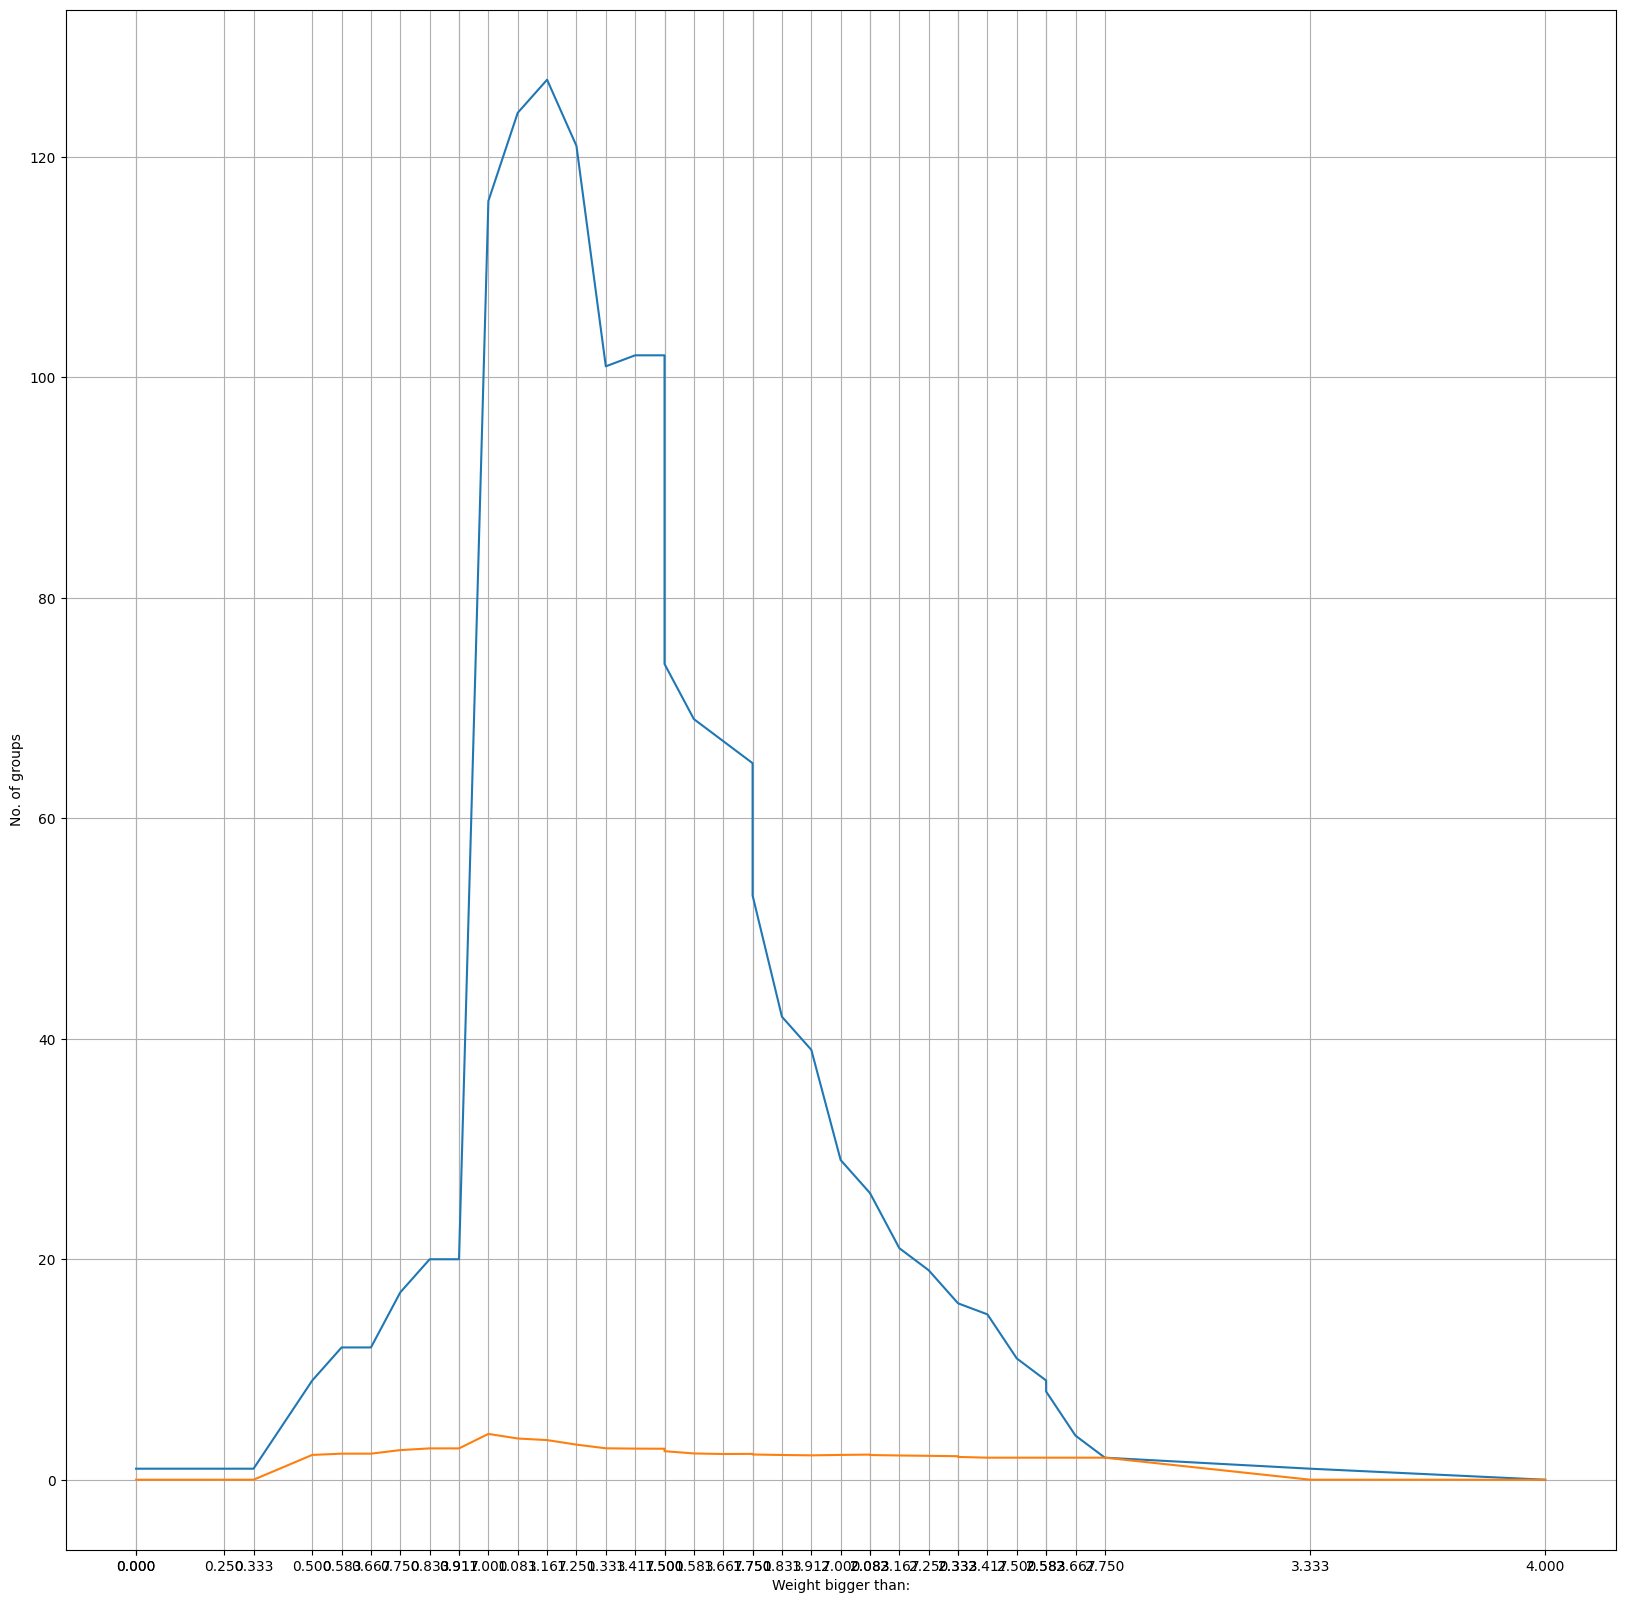

In [ ]:
plt.plot(weightlist, no_of_comms)
plt.plot(weightlist, susceptibility)
plt.xticks(weightlist)
plt.xlabel('Weight bigger than:')
plt.ylabel('No. of groups')
plt.grid(True)

In [ ]:
fig, ax = plt.subplots()

ax.plot(weightlist, no_of_comms, color="blue")                  # set line color to blue
ax.set_xlabel('Weight Bigger than')
ax.set_ylabel('Max community sizes', color="blue")
ax.set_xticks(weightlist)# set y axis title to blue
ax.tick_params(axis='y', colors="blue")  
ax.grid(True)# set y axis tick labels to blue

# We create another axis object. It shares the same x axis as ax, but the y-axis is separate.
ax2 = ax.twinx()
ax2.plot(weightlist, susceptibility, color="red")                  # set line color to red
ax2.set_ylabel('Phase shift', color="red")        # set y axis title to red
ax2.tick_params(axis='y', colors="red")       # set y axis tick labels to red
ax2.grid(True)

plt.show()

NameError: name 'plt' is not defined

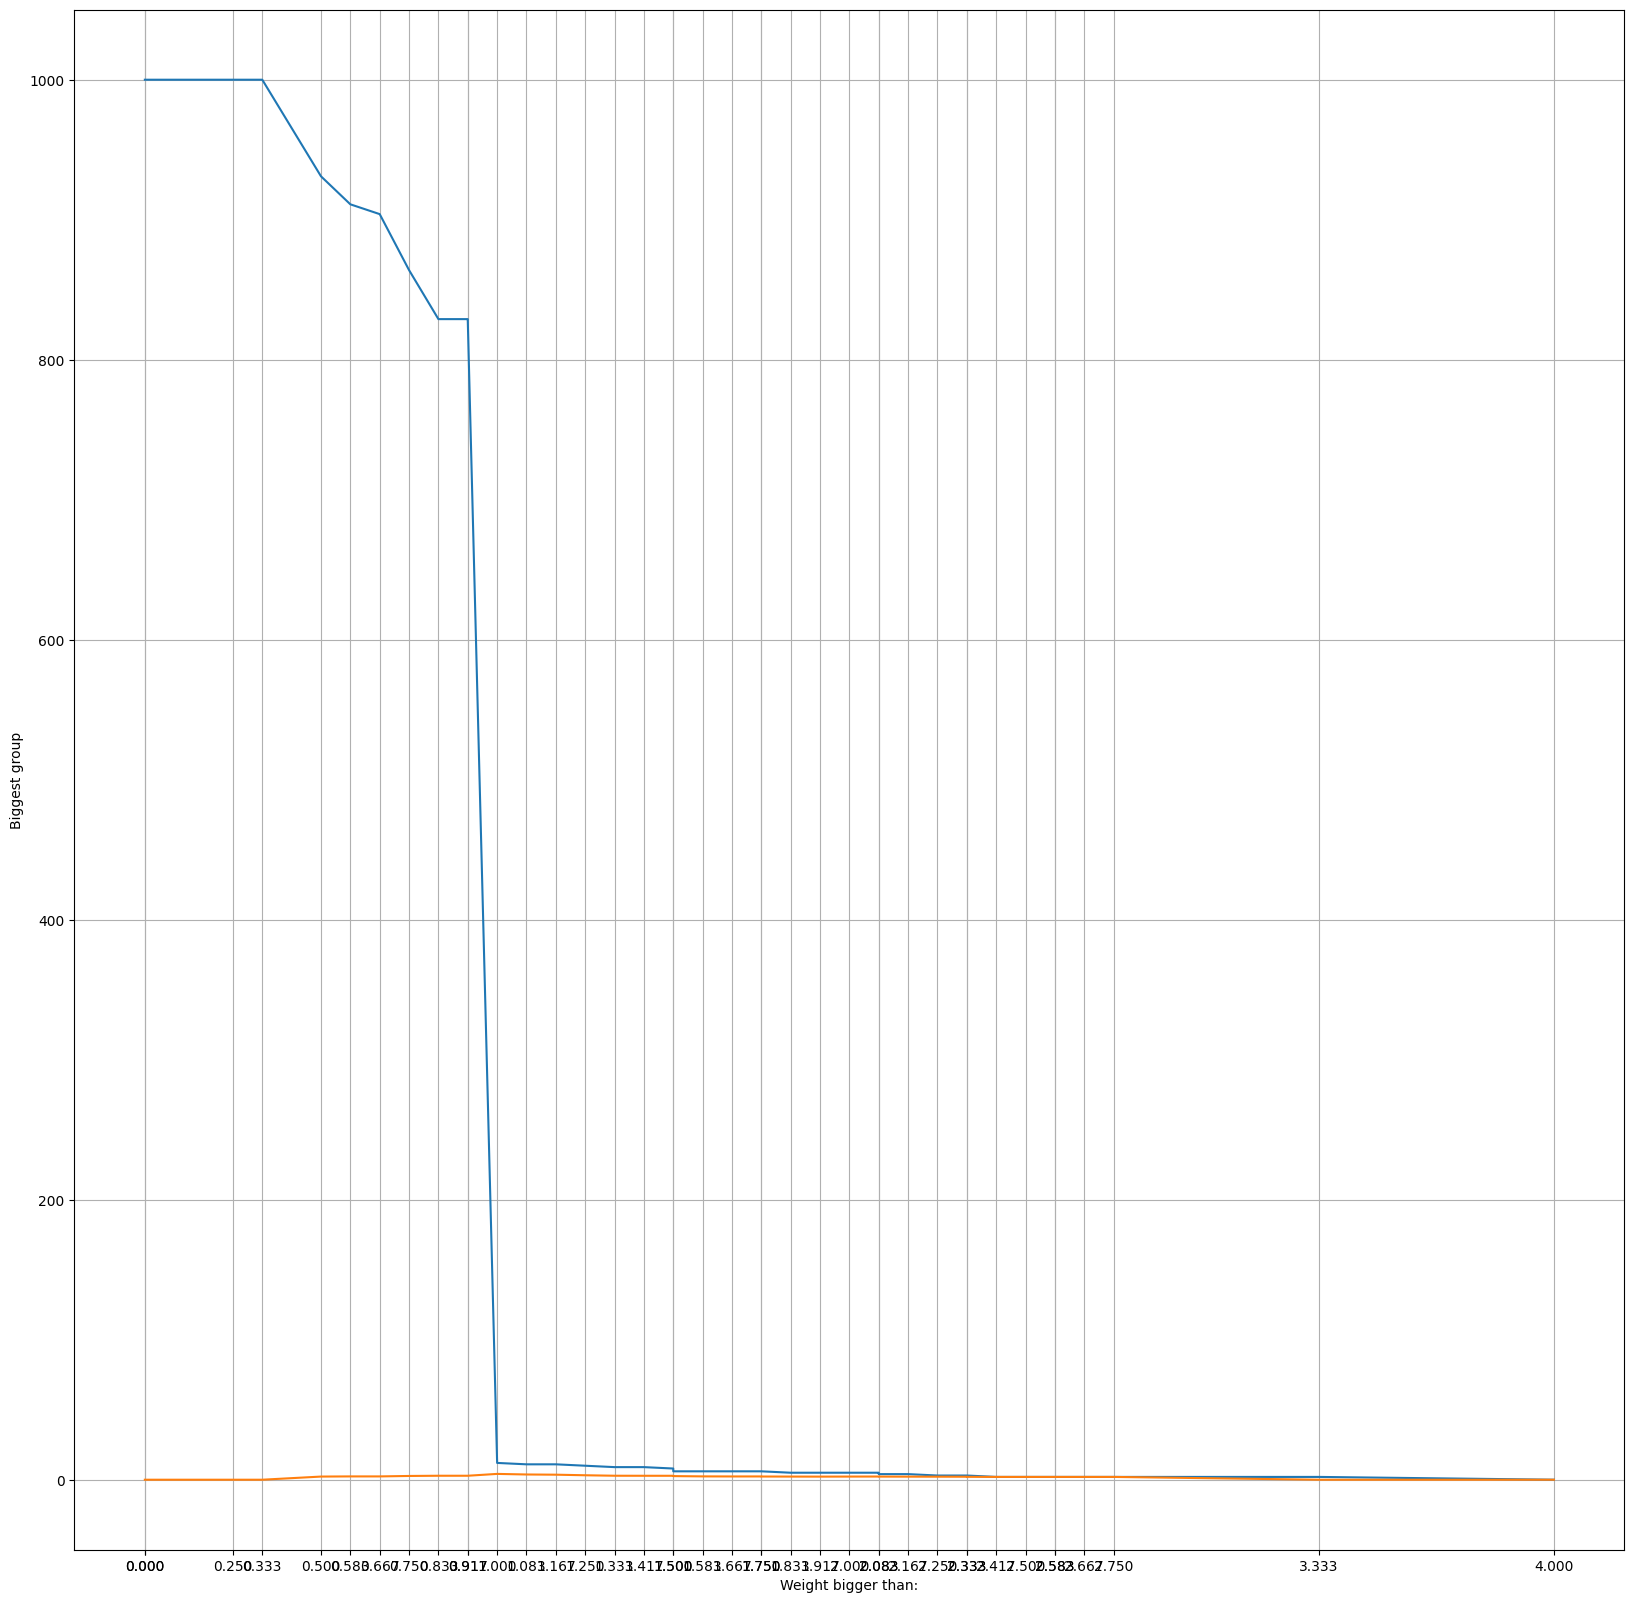

In [ ]:


plt.plot(weightlist, comm_maxes)
plt.plot(weightlist, susceptibility)
plt.xticks(weightlist)
plt.xlabel('Weight bigger than:')
plt.ylabel('Biggest group')
plt.grid(True)

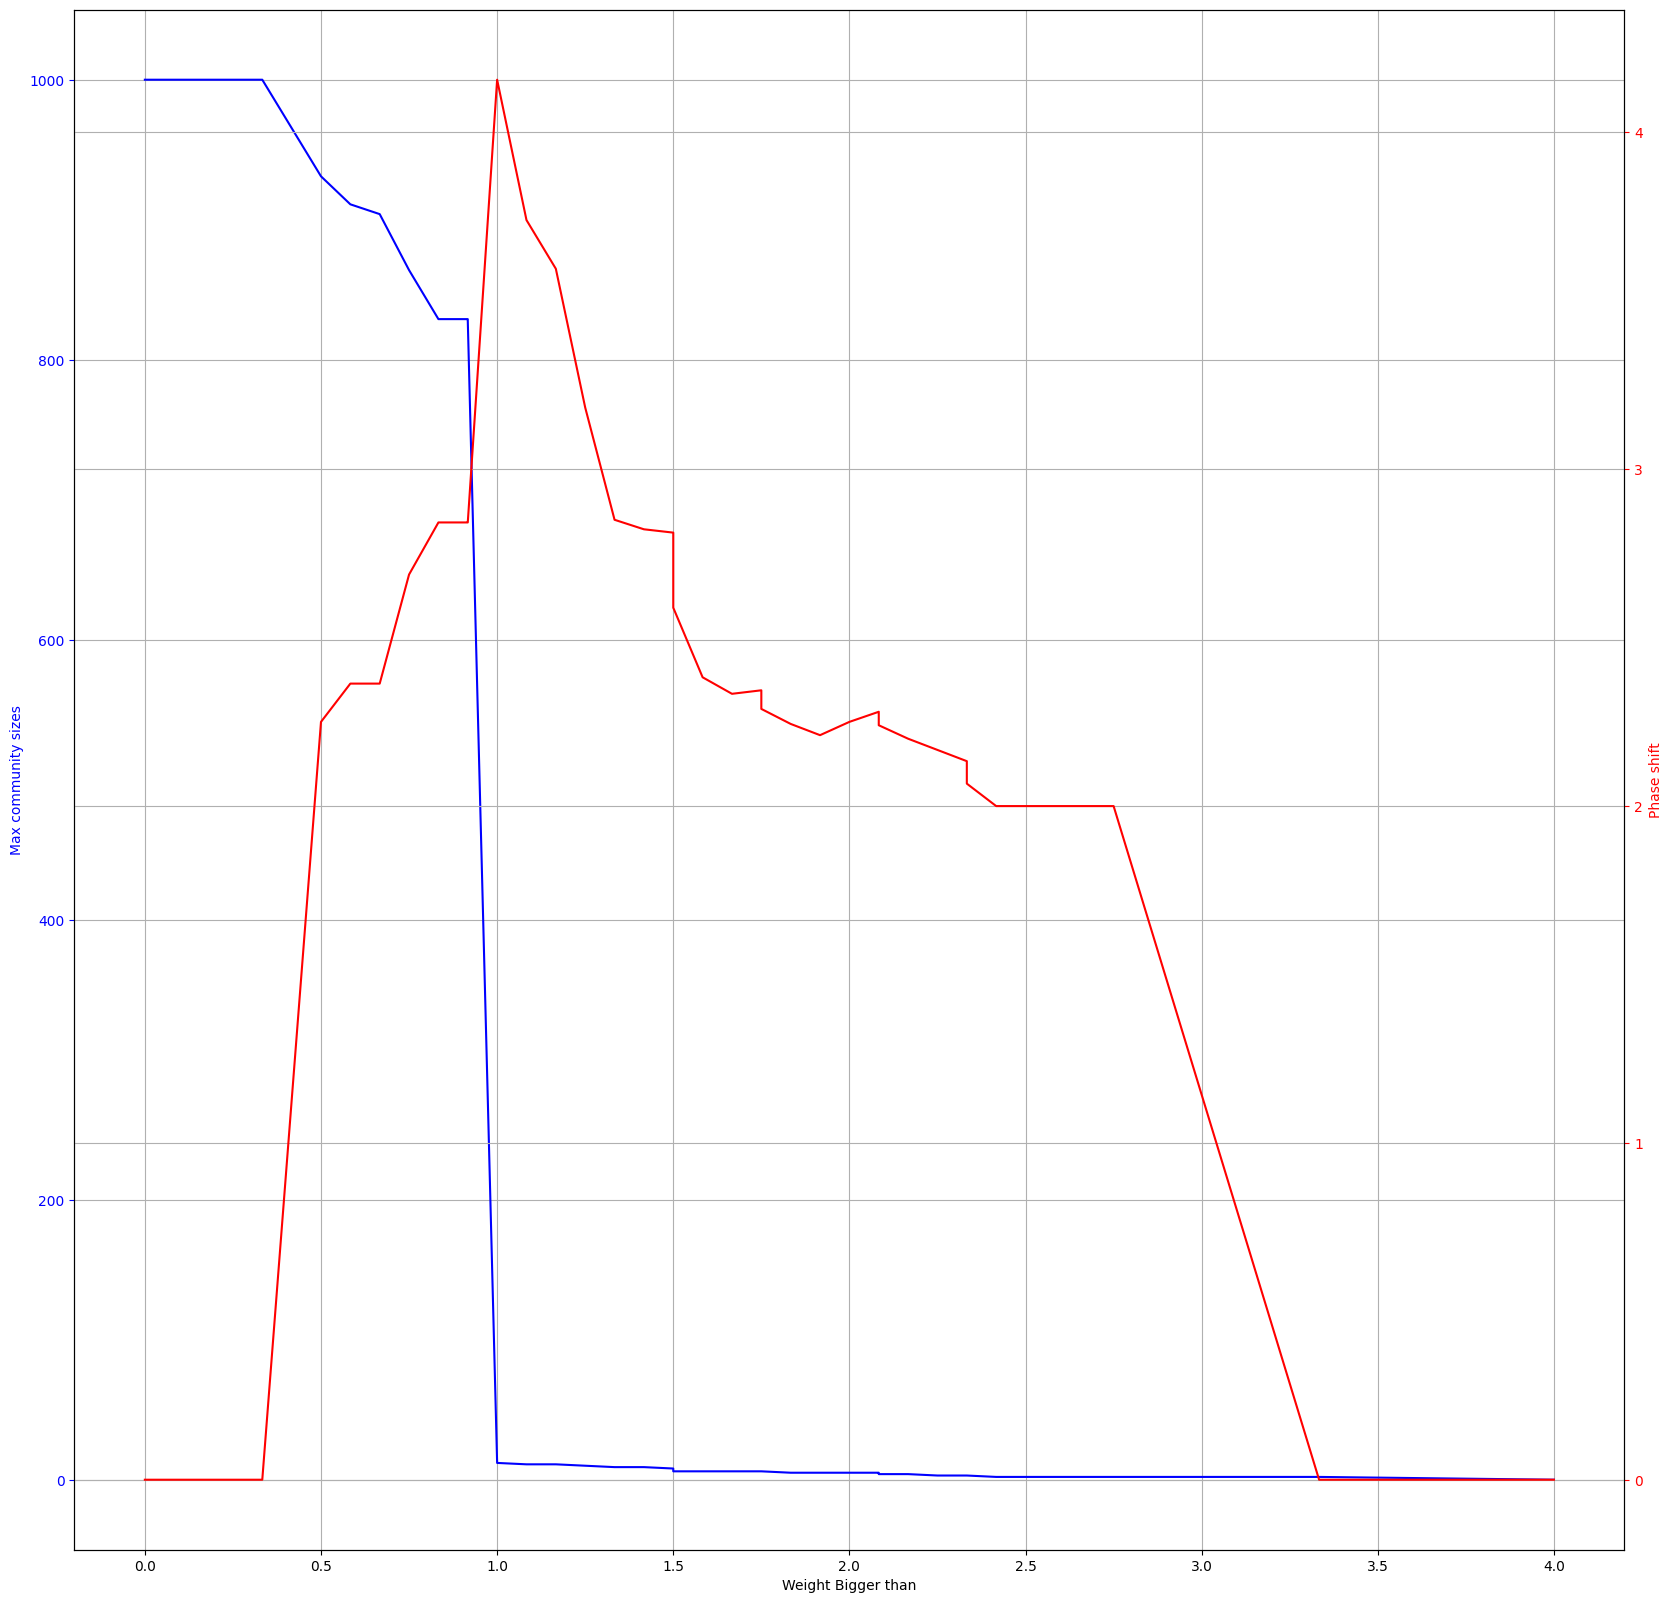

In [ ]:
fig, ax = plt.subplots()

ax.plot(weightlist, comm_maxes, color="blue")                  # set line color to blue
ax.set_xlabel('Weight Bigger than')
ax.set_ylabel('Max community sizes', color="blue")        # set y axis title to blue
ax.tick_params(axis='y', colors="blue")  
ax.grid(True)# set y axis tick labels to blue

# We create another axis object. It shares the same x axis as ax, but the y-axis is separate.
ax2 = ax.twinx()
ax2.plot(weightlist, susceptibility, color="red")                  # set line color to red
ax2.set_ylabel('Phase shift', color="red")        # set y axis title to red
ax2.tick_params(axis='y', colors="red")       # set y axis tick labels to red
ax2.grid(True)

plt.show()

In [ ]:
dropped_edges = []

for l in range(0, len(weightlist)):
    dropped_edges.append(abs(len(weighted_dict['weightup_%s' % weightlist[l]]) - len(weighted_dict['weightup_%s' % weightlist[l-1]])))
    
    
dropped_edges[0] = 0
dropped_edges

[0,
 0,
 2454,
 1894,
 1951,
 108,
 54,
 166,
 131,
 7,
 2,
 751,
 40,
 11,
 70,
 90,
 2,
 1,
 72,
 24,
 6,
 2,
 19,
 17,
 5,
 11,
 3,
 1,
 7,
 4,
 4,
 1,
 2,
 4,
 2,
 1,
 4,
 2,
 1,
 1]

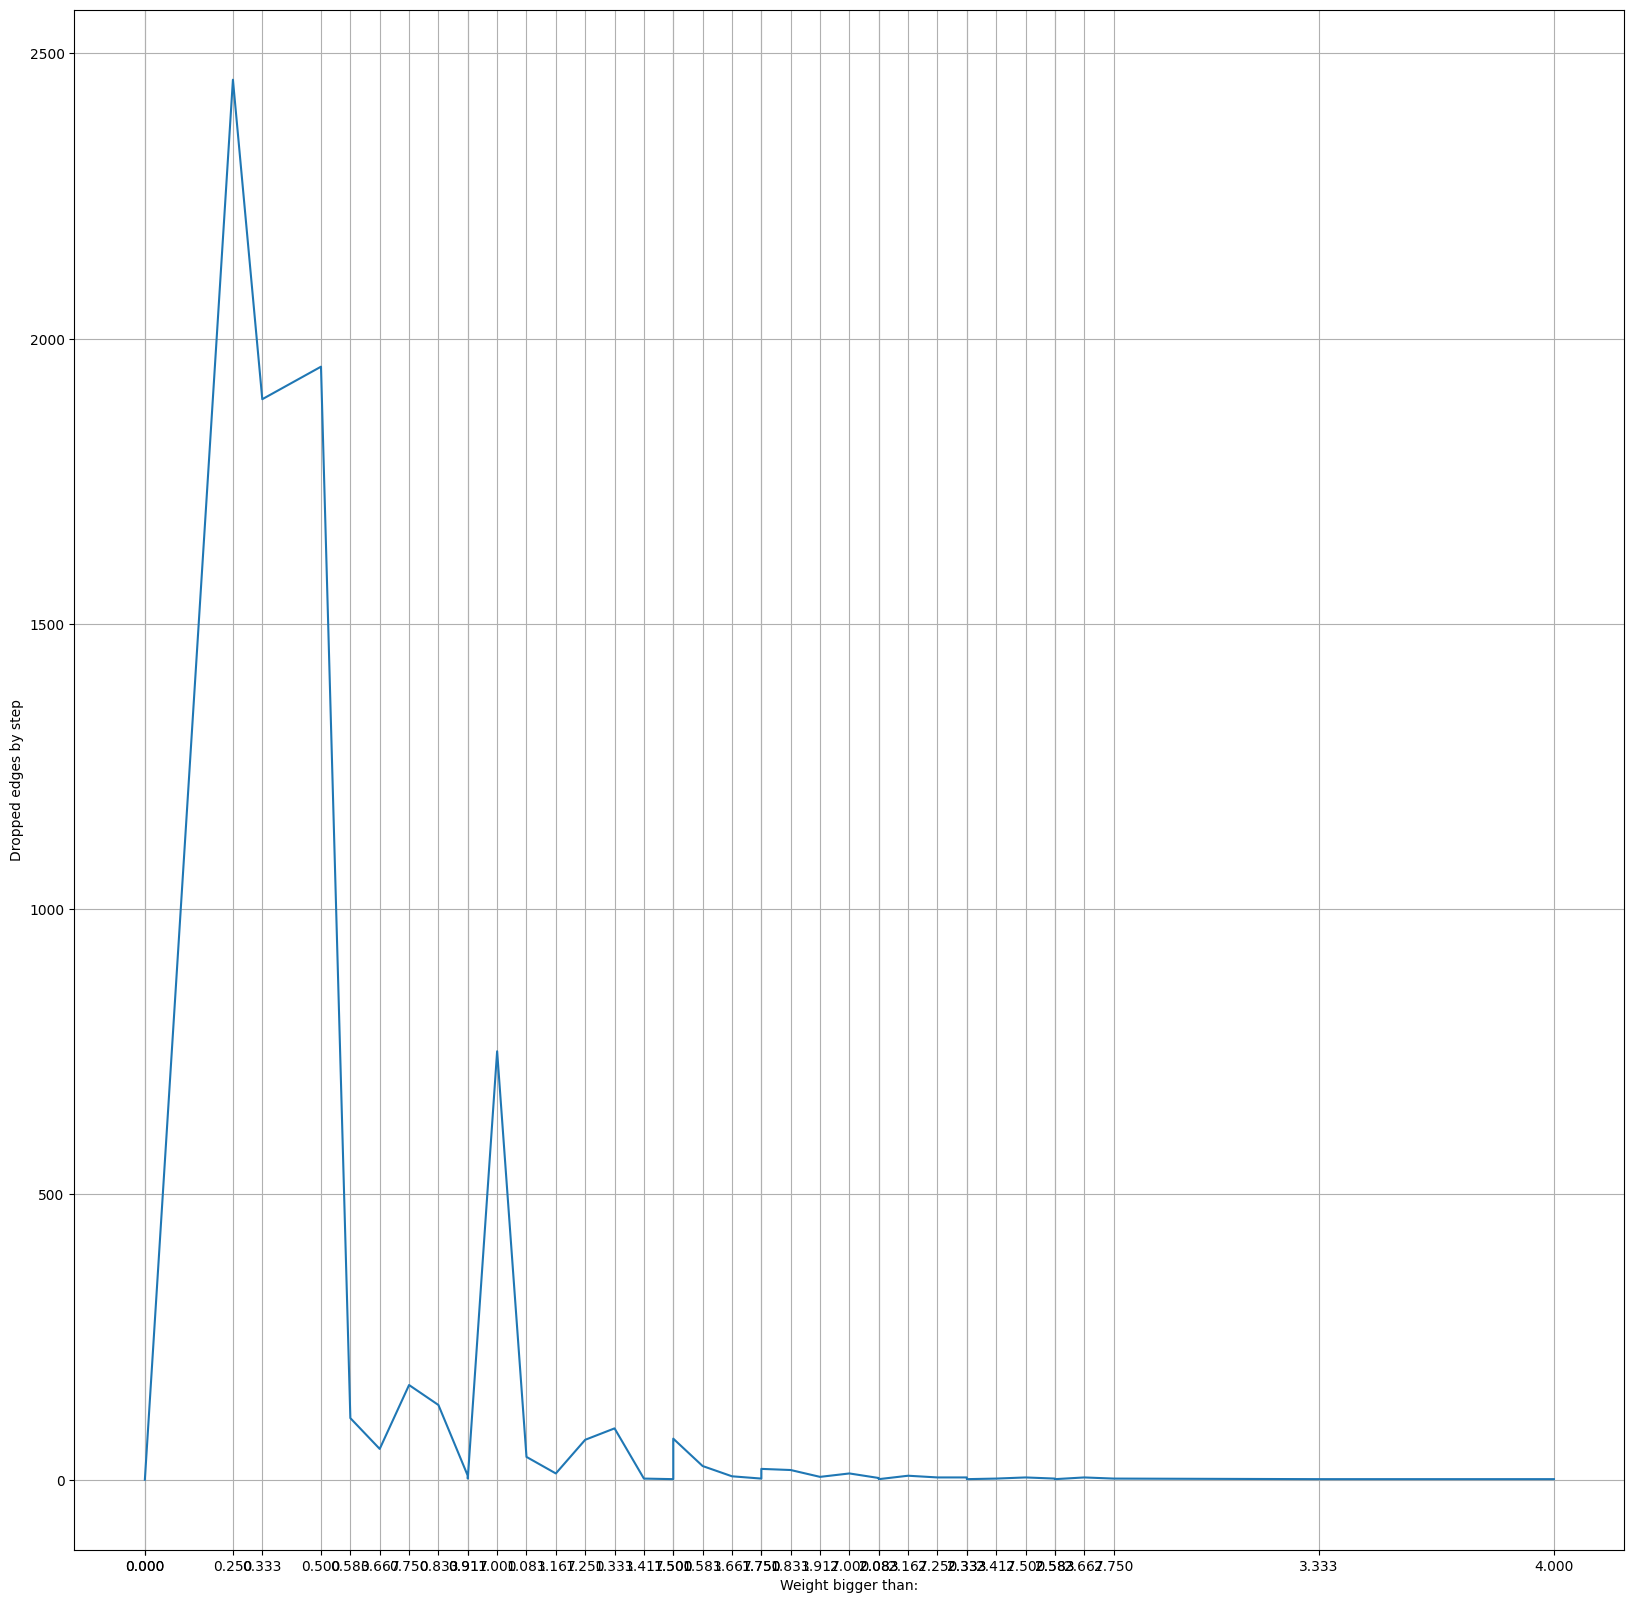

In [ ]:
plt.plot(weightlist, dropped_edges)
plt.xticks(weightlist)
plt.xlabel('Weight bigger than:')
plt.ylabel('Dropped edges by step')
plt.grid(True)

# Clustering

In [ ]:
ABCD_groups = {}
clique_groups = {}
groups_k = {}

N = 2

for i in range(1, len(assign)+1):
    ABCD_groups[i] = [int(assign[i-1])]
    
#------------------------------------------------------------------------

for i in range(0, len(weightlist)):
    groups_k['w_%s' % weightlist[i]] = {}
    for l in range(1, len(list(k_clique_communities(graphs['graph_%s' % i], N, cliques=None))) + 1):
        groups_k['w_%s' % weightlist[i]][l] = []
        #groups_k['w_%s' % weightlist[i]][0] = []
        groups_k['w_%s' % weightlist[i]][l] = (sorted(list(k_clique_communities(graphs['graph_%s' % i], N))[l-1]))
    clique_groups['w_%s' % weightlist[i]] = {}
    for k in groups_k['w_%s' % weightlist[i]]:
        for v in groups_k['w_%s' % weightlist[i]][k]:
             clique_groups['w_%s' % weightlist[i]].setdefault(v, []).append(k)
    #middleman['w_%s' % weightlist[i]] = dict((v, [k]) for k in groups_k['w_%s' % weightlist[i]] for v in groups_k['w_%s' % weightlist[i]][k])
    for j in [x for x in range(1,max(nodelist)+1) if x not in (list(dict((v, [k]) for k in groups_k['w_%s' % weightlist[i]] for v in groups_k['w_%s' % weightlist[i]][k]).keys()))]:
        clique_groups['w_%s' % weightlist[i]][j] = [0]


#ABCD_groups

In [ ]:
clustering_ABCD = Clustering(ABCD_groups)

clustering_clique = {}

similarities = []

for i in range(1, len(clique_groups) + 1):
    clustering_clique[i] = Clustering(clique_groups['w_%s' % weightlist[i-1]])
    similarities.append( sim.element_sim(clustering_ABCD, clustering_clique[i], alpha = 0.9))
    print("Element-centric Similarity No.%s:" %i, sim.element_sim(clustering_ABCD, clustering_clique[i], alpha = 0.9) )

SyntaxError: invalid syntax (2158795259.py, line 6)

In [ ]:
plt.plot(weightlist, similarities)
plt.xticks(weightlist)
plt.yticks(similarities)
plt.title('Similarity number by weights')
plt.grid(True)


In [ ]:
end = time.time()
print("Speed of the program:\n", (end - start)/60, "mins")

Speed of the program:
 476.2865316907565 mins
